In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('quora question pairs.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
219546,219546,311684,326448,How much does it cost to build an Android app ...,How much does it cost to build a news aggregat...,0
190508,190508,289616,289617,Is the liquid on Mars really water?,How do we know the ice on Mars is actually fro...,1
266462,266462,33412,82345,Why do so many people ask questions on Quora t...,Why does people here in Quora still ask some q...,1
4824,4824,9523,9524,What books can I read to learn more about secu...,Which books should I read to learn about Buddh...,0
133862,133862,214073,64315,How was the United Nations Security Council (p...,How would a permanent seat in the United Natio...,0
80523,80523,99190,15265,Why does 0! Equal 1?,Why is 0! equal to 1?,1
142415,142415,225852,225853,What are some TV shows similar to Black Mirror?,Could you reccomend a TV series that's similar...,1
22377,22377,42000,42001,What is the difference between concave and con...,How do concave and convex mirrors differ?,1
360331,360331,490112,490113,How can reading improve my English?,How can reading improve english?,1
305626,305626,44976,337272,How different and similar are the presidential...,What is the difference in the concept between ...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

pairs distribution: 
0    255024
1    149263
Name: is_duplicate, dtype: int64
percentage distribution: 
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


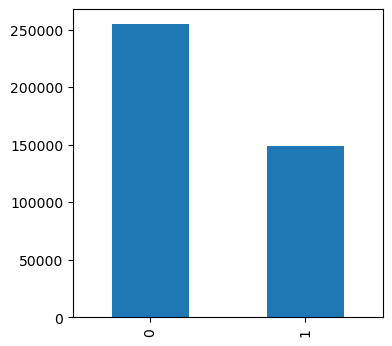

In [10]:
#distribution of duplicates and non-duplicates in the dataset

print('pairs distribution: ')
print(df['is_duplicate'].value_counts())
print('percentage distribution: ')
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())* 100)
plt.figure(figsize=(4, 4))
df['is_duplicate'].value_counts().plot(kind='bar');

In [11]:
id1 = df['qid1'].tolist()
id2 = df['qid2'].tolist()

In [12]:
len(id1)

404287

In [13]:
len(id2)

404287

In [14]:
qid = pd.Series(id1 + id2)

In [15]:
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808569    379845
808570    155606
808571    537929
808572    537931
808573    537933
Length: 808574, dtype: int64

In [19]:
qid.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537929, dtype: int64

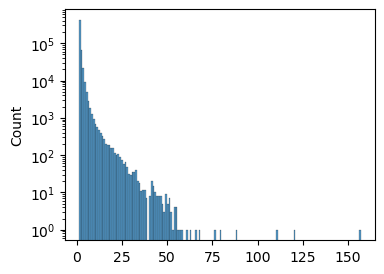

In [30]:
# duplicate question plotting in histogram
plt.figure(figsize=(4, 3))
sns.axes_style(style='darkgrid')
sns.histplot(qid.value_counts().values, bins=160 )
plt.yscale("log");